In [9]:
import pandas as pd
import numpy as np

In [10]:
#なんの分析をしているのか？
#直前の値動きの方向に次の足も賭け続けたらどうなるか？

#つまり

#上がった → 次もロング

#下がった → 次はショート

#という 最短・最弱のトレンドフォロー戦略。

In [11]:
raw = pd.read_csv(r'C:\market_data\USDJPY_M15.csv')

In [12]:
# datetime を作る
raw['datetime'] = pd.to_datetime(
    raw['<DTYYYYMMDD>'].astype(str) +
    raw['<TIME>'].astype(str).str.zfill(4),
    format='%Y%m%d%H%M'
)

raw.set_index('datetime', inplace=True)

# CLOSEだけ取り出す（indexはdatetimeのまま）
data = raw[['<CLOSE>']].copy()
data.rename(columns={'<CLOSE>': 'price'}, inplace=True)

In [13]:
data = pd.DataFrame(raw['<CLOSE>'])
data.rename(columns={'<CLOSE>': 'price'}, inplace=True)

In [14]:
# =========================
# ② 戦略ロジック
# =========================
data['returns'] = np.log(data['price'] / data['price'].shift(1)) #価格の変化率を時系列で測定

In [15]:
# 超単純戦略（方向追従）
data['position'] = np.sign(data['returns']) #モメンタム（勢い）があるか？
data['strategy'] = data['position'].shift(1) * data['returns'] #未来を見ない工夫（超重要） →　現実的なトレード再現

<Axes: title={'center': 'Buy & Hold vs Strategy'}, xlabel='datetime'>

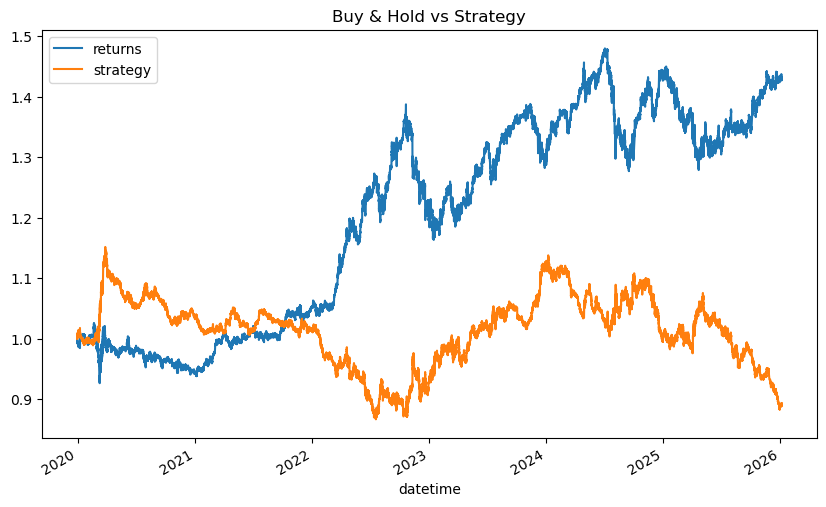

In [16]:
# =========================
# ③ 可視化
# =========================
(
    data[['returns', 'strategy']]
    .dropna()
    .cumsum()
    .apply(np.exp)      # .cumsum().apply(np.exp)      累積して指数化 →　資産曲線（エクイティカーブ)  実際に資金を運用したらどう増減するか
    .plot(figsize=(10, 6), title='Buy & Hold vs Strategy')    
)  

# 図で見ているもの returns   → 何もしない（Buy & Hold） |    strategy  → この戦略

In [17]:
#この分析で分かること
# ✔ 分かる  1,市場に 短期モメンタムがあるか    2,「方向に乗る」だけで利益になるか    3,SMA戦略を作る価値があるかどうか
#✖ 分からない  1,勝率  2,最大ドローダウン   3,実運用の耐久性

In [18]:
#P96↑完成

In [19]:
#P97↓

In [20]:
data['position'] = np.sign(data['returns'].rolling(3).mean())

In [21]:
data['strategy'] = data['position'].shift(1) * data['returns']

<Axes: title={'center': 'Buy & Hold vs Strategy'}, xlabel='datetime'>

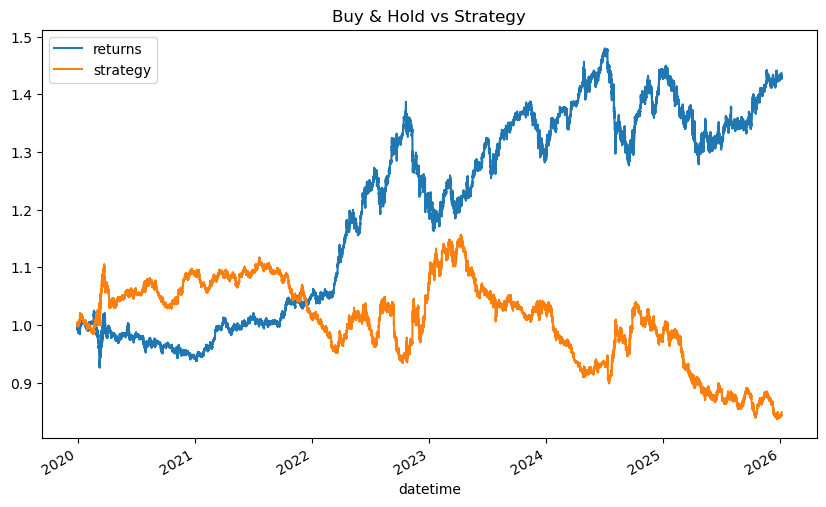

In [22]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6), title='Buy & Hold vs Strategy')

In [23]:
#P99↓

In [24]:
import pandas as pd
import numpy as np

In [25]:
fn = r'C:\market_data\USDJPY_M5.csv'
# fn = a'C:\market_data\EURUSD_M5.csv'

In [26]:
raw = pd.read_csv(fn, index_col=0, parse_dates=True)

In [27]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449506 entries, USDJPY to USDJPY
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   <DTYYYYMMDD>  449506 non-null  int64  
 1   <TIME>        449506 non-null  int64  
 2   <OPEN>        449506 non-null  float64
 3   <HIGH>        449506 non-null  float64
 4   <LOW>         449506 non-null  float64
 5   <CLOSE>       449506 non-null  float64
 6   <VOL>         449506 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 27.4+ MB


In [28]:
# ② datetime を作る
raw['datetime'] = pd.to_datetime(
    raw['<DTYYYYMMDD>'].astype(str) +
    raw['<TIME>'].astype(str).str.zfill(4),
    format='%Y%m%d%H%M'
)

# ③ datetime を index にする
raw.set_index('datetime', inplace=True)

# ④ Closeだけ取り出す
data = raw[['<CLOSE>']].copy()
data.rename(columns={'<CLOSE>': 'price'}, inplace=True)


In [29]:
# ここから戦略計算 「対数収益率(returns)」
data['returns'] = np.log(data['price'] / data['price'].shift(1))  #図のreturnsのやつ

In [30]:
print(data.columns)  #列名が[price]だから、↑もそうしないとエラーになる。


Index(['price', 'returns'], dtype='object')


In [31]:
to_plot = ['returns']

In [32]:
for m in [1, 3, 5, 7, 100]:  #図のstrategy_1～9のやつ
    data[f'position_{m}'] = np.sign(data['returns'].rolling(m).mean())
    data[f'strategy_{m}'] = (data[f'position_{m}'].shift(1) *
                             data['returns'])
    to_plot.append(f'strategy_{m}')

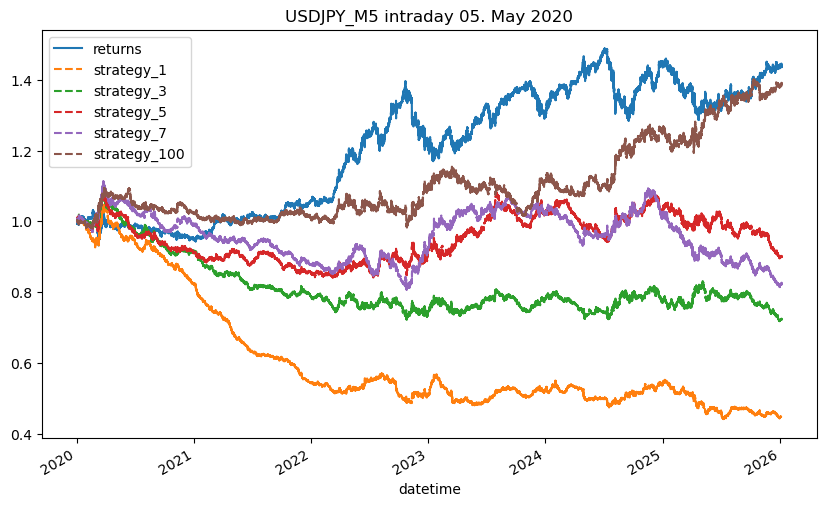

In [33]:
#戦略の累積収益を描く
data[to_plot].dropna().cumsum().apply(np.exp).plot(
    title='USDJPY_M5 intraday 05. May 2020',
    figsize=(10, 6), style=['-', '--', '--', '--', '--','--']);

#cumsum() → 累積和（累積収益）
#exp() → 対数収益を通常のリターンに戻す
#つまり 戦略がどれだけ増えたかをグラフ化している。

In [34]:
#「移動平均（SMA）を使った複数のシンプルな売買戦略を比較し、どれが一番利益が出るかを見る」という分析をしている。↑

In [35]:
#P102↓

In [36]:
import pandas as pd
raw = pd.read_csv(r"C:\market_data\USDJPY_M5.csv")
print(raw.head())
print(raw.columns)


  <TICKER>  <DTYYYYMMDD>  <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  \
0   USDJPY      20191231    2155  108.619  108.631  108.613  108.631   
1   USDJPY      20200101    2200  108.730  108.751  108.715  108.751   
2   USDJPY      20200101    2205  108.759  108.759  108.736  108.738   
3   USDJPY      20200101    2210  108.738  108.750  108.590  108.728   
4   USDJPY      20200101    2215  108.728  108.735  108.575  108.677   

        <VOL>  
0    25480000  
1    23940000  
2  1235950000  
3   329800000  
4   127520000  
Index(['<TICKER>', '<DTYYYYMMDD>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>',
       '<CLOSE>', '<VOL>'],
      dtype='object')


In [37]:
import importlib
import MomVectorBacktester as Mom
importlib.reload(Mom)


<module 'MomVectorBacktester' from 'c:\\Users\\Ryouh\\OneDrive\\デスクトップ\\VScode用データ\\Algorithmic Trading Book\\MomVectorBacktester.py'>

(np.float64(0.0), np.float64(-14515.75))


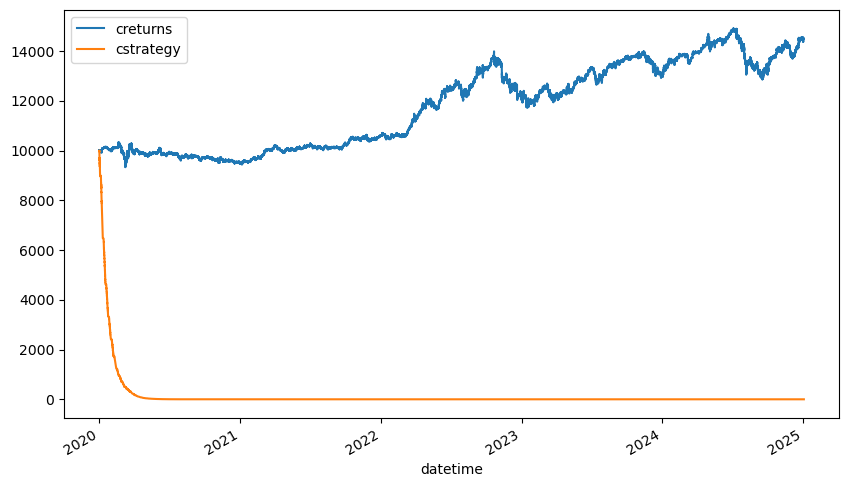

In [38]:
mombt = Mom.MomVectorBacktester(
    csv_path=r"C:\market_data\USDJPY_M5.csv",
    start="2019-12-31",
    end="2025-01-02",
    amount=10000,
    tc=0.001
)

print(mombt.run_strategy(momentum=5)) #5本分の平均リターンを見て判断するという意味
mombt.plot_results()

In [39]:
mombt.run_strategy(momentum=5) #5本分の平均リターンを見て判断するという意味

(np.float64(0.0), np.float64(-14515.75))

(np.float64(0.0), np.float64(-14515.75))


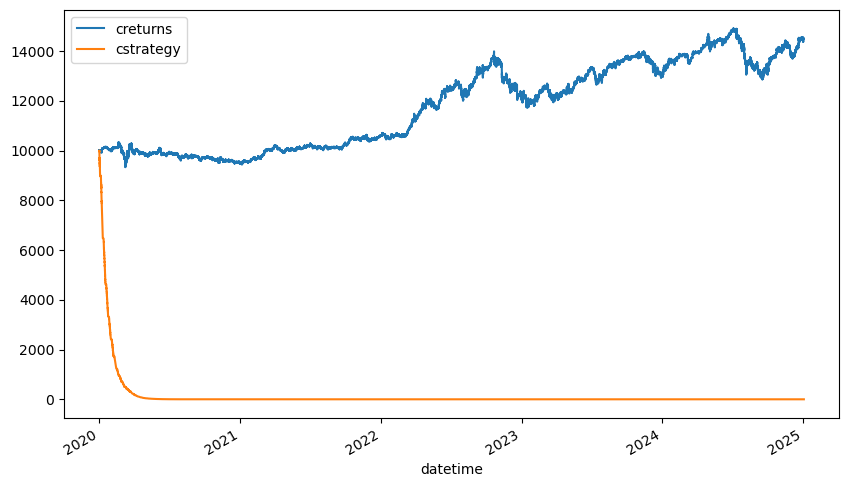

In [40]:
mombt = Mom.MomVectorBacktester(
    csv_path=r"C:\market_data\USDJPY_M5.csv",
    start="2019-12-31",
    end="2025-01-02",
    amount=10000,
    tc=0.001
)

print(mombt.run_strategy(momentum=5))
mombt.plot_results()


In [41]:
mombt.run_strategy(momentum=5)

(np.float64(0.0), np.float64(-14515.75))

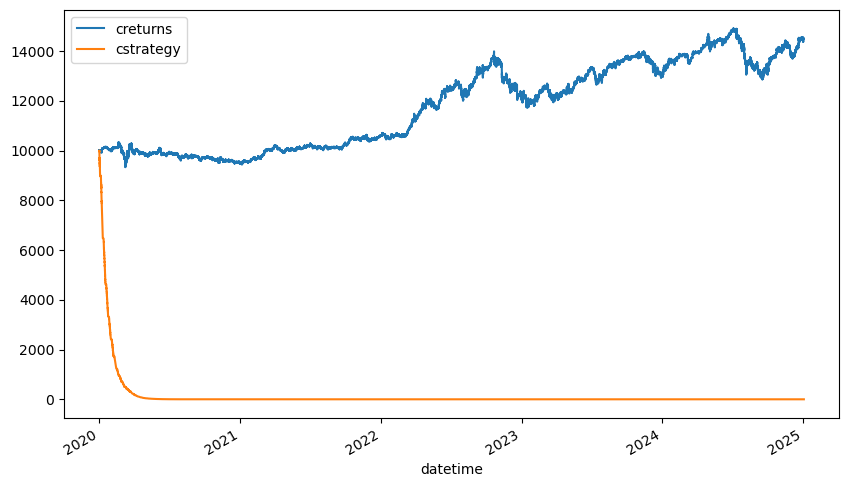

In [42]:
mombt.plot_results()

In [43]:
#これらはモメンタム戦略のバックテストをしている
#「モメンタム戦略」って何？
#「一定期間の平均リターンがプラスなら買い、マイナスなら売り」という 勢い（Momentum）に乗る戦略です。

In [44]:
#P104↓

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
print(raw.columns)

Index(['<TICKER>', '<DTYYYYMMDD>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>',
       '<CLOSE>', '<VOL>'],
      dtype='object')


In [47]:
# ① rawデータから終値だけ取り出してDataFrameを作る
data = pd.DataFrame(raw['<CLOSE>'])

In [55]:
# ② 列名を 'price' に変更
data.rename(columns={'<CLOSE>': 'price'}, inplace=True)

In [56]:
# ③ 対数リターンを計算（log return）
data['returns'] = np.log(data['price'] /
                         data['price'].shift(1))

In [57]:
# ④ SMAの期間（25本）
SMA =25

In [58]:
# ⑤ 25本の単純移動平均を計算
data['SMA'] = data['price'].rolling(SMA).mean()

In [59]:
# ⑥ 乖離の閾値を設定
threshold = 3.5

In [60]:
# ⑦ 価格と移動平均の差（乖離）を計算
data['distance'] = data['price'] - data['SMA']

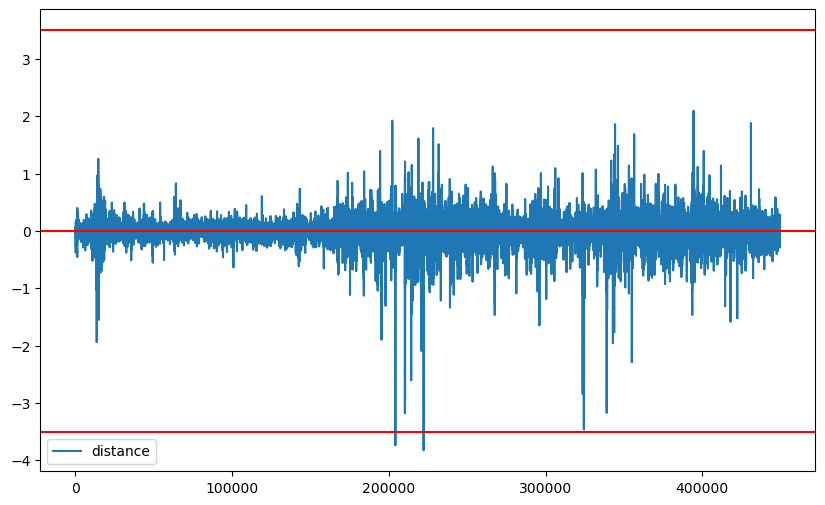

In [61]:
# ⑧ 乖離をプロット（NaNを除外）
data['distance'].dropna().plot(figsize=(10, 6), legend=True)

# ⑨ 閾値のラインを引く
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r')

In [62]:
#P104↑　　このコードは 「価格が移動平均からどれだけ離れているか（乖離）」を見て、一定以上離れたら何かしらの売買判断に使えるようにするための分析

In [120]:
#P105↓

In [154]:
print(data['distance'].describe())
print((data['distance'] > threshold).sum())
print((data['distance'] < -threshold).sum())


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: distance, dtype: float64
0
0


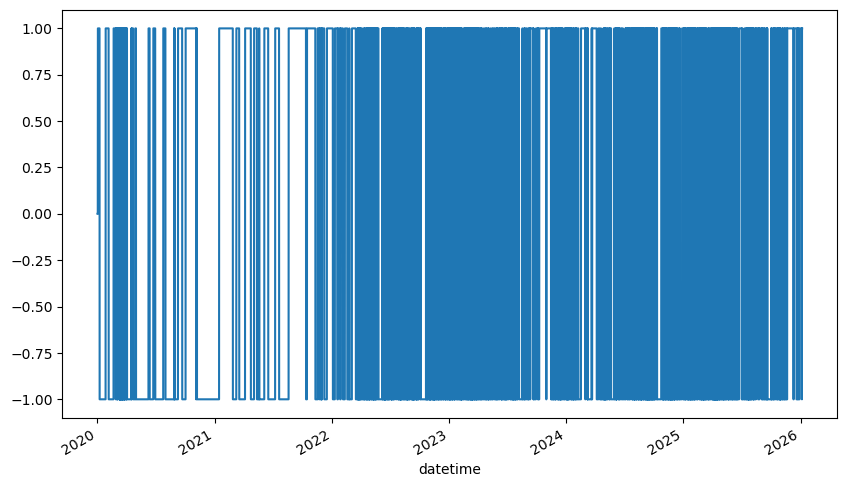

In [164]:
import numpy as np
import matplotlib.pyplot as plt

SMA = 25

# ① price だけを取り出す
data = pd.DataFrame(raw['<CLOSE>'])
data.rename(columns={'<CLOSE>': 'price'}, inplace=True)

# ② SMA
data['SMA'] = data['price'].rolling(SMA).mean()

# ③ distance
data['distance'] = data['price'] - data['SMA']

# ④ position を初期化
data['position'] = np.nan

# ⑤ threshold を「標準偏差で自動設定」
threshold = data['distance'].std() * 2

# ⑥ シグナル
data.loc[data['distance'] > threshold, 'position'] = -1
data.loc[data['distance'] < -threshold, 'position'] = 1

# ⑦ position を継続（NaNを前の値で埋める）
data['position'] = data['position'].ffill().fillna(0)

# ⑧ 次足から反映
data['position'] = data['position'].shift(1)

# ⑨ NaN削除（positionだけ）
data.dropna(subset=['position'], inplace=True)

# ⑩ 描画
data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1], figsize=(10, 6))
plt.show()


In [156]:
print(data['position'].diff().abs().sum())


5301.0


In [165]:
print(data['distance'].describe())


count    449482.000000
mean          0.001277
std           0.133768
min          -3.826480
25%          -0.045520
50%           0.002800
75%           0.052040
max           2.097440
Name: distance, dtype: float64


In [166]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
print(data.columns)


Index(['price', 'SMA', 'distance', 'position'], dtype='object')


In [168]:
SMA = 25
threshold = 3.5

# SMA作成
data['SMA'] = data['price'].rolling(SMA).mean()



# 例：data が既に price と SMA を持っている前提

# ① distance
data['distance'] = data['price'] - data['SMA']

# ② position 初期化
data['position'] = np.nan


In [169]:
data['position'] = np.where(data['distance'] > threshold,
                            -1, data['position'])

In [170]:
data['position'] = np.where(data['distance'] < threshold,
                            1, data['position'])

In [171]:
data['position'] = data['position'].ffill().fillna(0)

In [172]:
# ④ 次足から反映
data['position'] = data['position'].shift(1)

In [173]:
# ⑤ 欠損を落とす
data.dropna(inplace=True)

In [174]:
plt.clf()
plt.close()

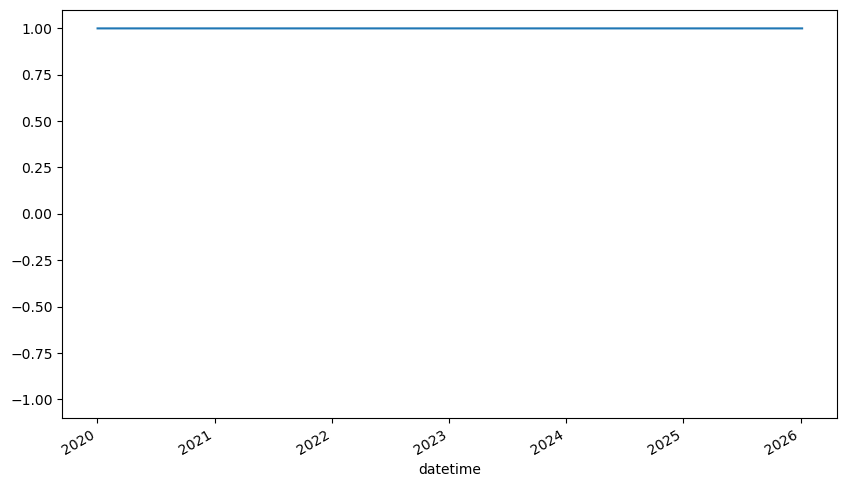

In [175]:
data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1],
                                 figsize=(10, 6))
plt.show()

In [176]:
#↑一旦ここは保留

In [194]:
#P106～P107↓

In [212]:
data['position'] = 0

# price が SMA より上 → 買い
data.loc[data['distance'] > 0, 'position'] = 1

# price が SMA より下 → 売り
data.loc[data['distance'] < 0, 'position'] = -1


In [213]:
# ここから戦略計算 「対数収益率(returns)」
data['returns'] = np.log(data['price'] / data['price'].shift(1))  #図のreturnsのやつ

In [214]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [215]:
data['position'] = np.where(data['distance'] > 0, 1, -1)


<Axes: xlabel='datetime'>

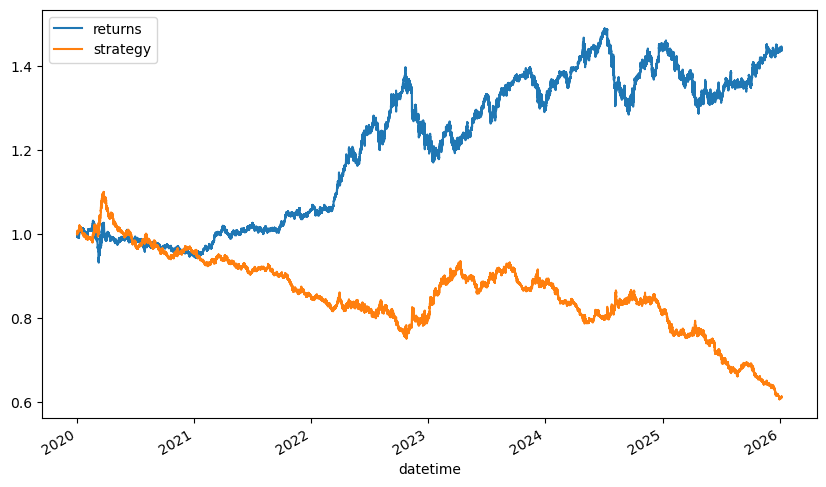

In [216]:
data[['returns', 'strategy']].dropna().cumsum(
    ).apply(np.exp).plot(figsize=(10, 6))


In [177]:
#P107↓

In [188]:
from MRVectorBacktester import MRVectorBacktester

mrbt = MRVectorBacktester(
    csv_path=r"C:\market_data\USDJPY_M5.csv",
    start='2019-01-01',
    end='2020-12-31',
    amount=10000,
    tc=0.001
)


In [191]:
mrbt.run_strategy(SMA=43, threshold=0.5)

(np.float64(8995.51), np.float64(-497.54))

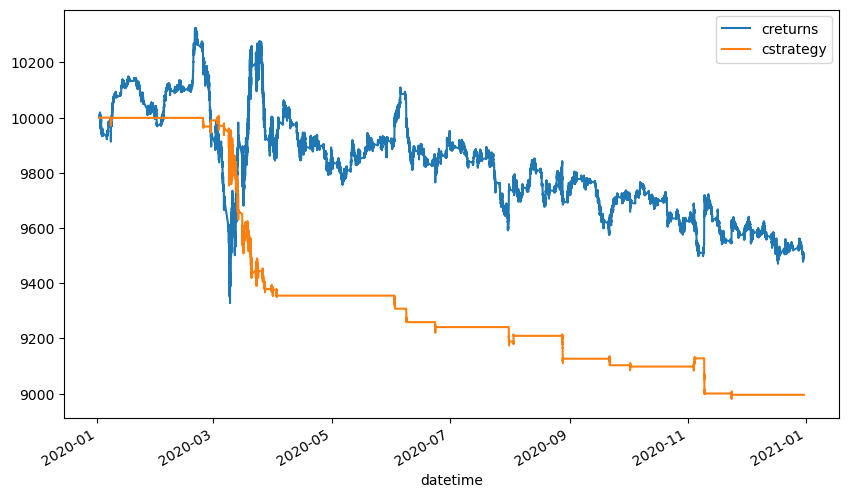

In [192]:
mrbt.plot_results()

In [ ]:
#P107～P108↑　「移動平均から離れたら逆張りして、平均に戻ったら決済する」　　平均回帰戦略のバックテスト